In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# ===============================
# ARRAYS FROM SCRATCH VS GRADIENT
# ===============================

np.random.seed(0)
u = np.round(np.random.randn(6,6), 2)

dx = 0.01
dy = 0.01

print('Initial array \n', u)
print('\n')

# ===============================
# 1ST ORDER - ARRAYS
# ===============================
u_array = np.zeros((2, len(u), len(u)))

components, n_rows, n_cols = u_array.shape

for i in range(0, components):
  u_vals = np.zeros((len(u), len(u)))
  if i == 0:
    u_vals[1:-1, :] = (u[2:, :] - u[:-2, :]) / (2 * dx)
    u_vals[0, :] = (u[1, :] - u[0, :]) / dx
    u_vals[-1, :] = (u[-1, :] - u[-2, :]) / dx
  elif i == 1:
    u_vals[:, 1:-1] = (u[:, 2:] - u[:, :-2]) / (2 * dy)
    u_vals[:, 0] = (u[:, 1] - u[:, 0]) / dy
    u_vals[:, -1] = (u[:, -1] - u[:, -2]) / dy

  u_array[i, :, :] = u_vals

dudx, dudy = u_array

# ===============================
# 1ST ORDER - np.gradient
# ===============================

dudx_, dudy_ = np.gradient(u)
dudx_ = dudx_/dx
dudy_ = dudy_/dy

print('Using finite differences in x-axis - 1st order \n', dudx)
print('\n')
print('Using np.gradient in x-axis - 1st order \n', dudx_)

print('\n')

print('Using finite differences in y-axis - 1st order \n', dudy)
print('\n')
print('Using np.gradient in y-axis - 1st order \n', dudy_)

print('\n')

# ===============================
# 2ND ORDER USING ARRAYS
# ===============================

u_array = np.zeros((2, len(u), len(u)))

components, n_rows, n_cols = u_array.shape

for i in range(0, components):
  u_vals = np.zeros((len(u), len(u)))
  if i == 0:
    u_vals[1:-1, 1:-1] = (u[2:, 1:-1] - 2 * u[1:-1, 1:-1] + u[:-2, 1:-1])/dx**2
  elif i == 1:
    u_vals[1:-1, 1:-1] = (u[1:-1, 2:] - 2 * u[1:-1, 1:-1] + u[1:-1, :-2])/dy**2

  u_array[i, :, :] = u_vals

d2udx2, d2udy2 = u_array

dudt = d2udx2 + d2udy2

print("x-axis direction - 2nd order \n", d2udx2)
print('\n')
print("y-axis direction - 2nd order \n", d2udy2)
print('\n')
print("time derivative\n", dudt)

# ===============================
# 2ND ORDER USING np.diff
# ===============================
d2udx2 = np.zeros_like(u)
d2udy2 = np.zeros_like(u)

d2udx2[1:-1, 1:-1] = np.diff(u[:,1:-1], n=2, axis=0) / (dx**2)
d2udy2[1:-1, 1:-1] = np.diff(u[1:-1,:], n=2, axis=1) / (dy**2)

dudt = d2udx2 + d2udy2

print('\n')
print("d2udx2 x-axis direction \n", d2udx2)
print('\n')
print("d2udy2 y-axis direction \n", d2udy2)
print('\n')
print("time derivative \n", dudt)

Initial array 
 [[ 1.76  0.4   0.98  2.24  1.87 -0.98]
 [ 0.95 -0.15 -0.1   0.41  0.14  1.45]
 [ 0.76  0.12  0.44  0.33  1.49 -0.21]
 [ 0.31 -0.85 -2.55  0.65  0.86 -0.74]
 [ 2.27 -1.45  0.05 -0.19  1.53  1.47]
 [ 0.15  0.38 -0.89 -1.98 -0.35  0.16]]


Using finite differences in x-axis - 1st order 
 [[ -81.   -55.  -108.  -183.  -173.   243. ]
 [ -50.   -14.   -27.   -95.5  -19.    38.5]
 [ -32.   -35.  -122.5   12.    36.  -109.5]
 [  75.5  -78.5  -19.5  -26.     2.    84. ]
 [  -8.    61.5   83.  -131.5  -60.5   45. ]
 [-212.   183.   -94.  -179.  -188.  -131. ]]


Using np.gradient in x-axis - 1st order 
 [[ -81.   -55.  -108.  -183.  -173.   243. ]
 [ -50.   -14.   -27.   -95.5  -19.    38.5]
 [ -32.   -35.  -122.5   12.    36.  -109.5]
 [  75.5  -78.5  -19.5  -26.     2.    84. ]
 [  -8.    61.5   83.  -131.5  -60.5   45. ]
 [-212.   183.   -94.  -179.  -188.  -131. ]]


Using finite differences in y-axis - 1st order 
 [[-136.   -39.    92.    44.5 -161.  -285. ]
 [-110.   -52.5 

In [3]:
# ===============================
# 2D - FIRST ORDER DERIVATIVE
# ===============================

import numpy as np

np.random.seed(0)
u = np.round(np.random.randn(6, 6), 2)

dx = 0.01
dy = 0.01

print('Initial array:\n', u)
print('\n')

u_array = np.zeros((2, len(u), len(u)))

components, nrows, ncols = u_array.shape

for i in range(components):
    u_vals = np.zeros((len(u), len(u)))
    for idx, vals in np.ndenumerate(u_vals):
        x, y = idx
        if i == 0:
            # top
            if x == 0:
                u_vals[x, y] = (u[x+1, y] - u[x, y]) / dx
            # bottom
            elif x == nrows - 1:
                u_vals[x, y] = (u[x, y] - u[x - 1, y]) / dx
            # interior points
            else:
                u_vals[x, y] = (u[x + 1, y] - u[x - 1, y]) / (2 * dx)
        else:
            # left
            if y == 0:
                u_vals[x, y] = (u[x, y + 1] - u[x, y]) / dy
            # right
            elif y == ncols - 1:
                u_vals[x, y] = (u[x, y] - u[x, y - 1]) / dy
            # interior
            else:
                u_vals[x, y] = (u[x, y + 1] - u[x, y - 1]) / (2 * dy)

    u_array[i, :, :] = u_vals

print('Array to store results:\n', u_array)
print('\n')

dudx, dudy = u_array

print('First derivative in x axis:\n', dudx)
print('\n')
print('First derivative in y axis:\n', dudy)

print('\n')
print('dudt = dudx + dudy\n', dudx + dudy)

Initial array:
 [[ 1.76  0.4   0.98  2.24  1.87 -0.98]
 [ 0.95 -0.15 -0.1   0.41  0.14  1.45]
 [ 0.76  0.12  0.44  0.33  1.49 -0.21]
 [ 0.31 -0.85 -2.55  0.65  0.86 -0.74]
 [ 2.27 -1.45  0.05 -0.19  1.53  1.47]
 [ 0.15  0.38 -0.89 -1.98 -0.35  0.16]]


Array to store results:
 [[[ -81.   -55.  -108.  -183.  -173.   243. ]
  [ -50.   -14.   -27.   -95.5  -19.    38.5]
  [ -32.   -35.  -122.5   12.    36.  -109.5]
  [  75.5  -78.5  -19.5  -26.     2.    84. ]
  [  -8.    61.5   83.  -131.5  -60.5   45. ]
  [-212.   183.   -94.  -179.  -188.  -131. ]]

 [[-136.   -39.    92.    44.5 -161.  -285. ]
  [-110.   -52.5   28.    12.    52.   131. ]
  [ -64.   -16.    10.5   52.5  -27.  -170. ]
  [-116.  -143.    75.   170.5  -69.5 -160. ]
  [-372.  -111.    63.    74.    83.    -6. ]
  [  23.   -52.  -118.    27.   107.    51. ]]]


First derivative in x axis:
 [[ -81.   -55.  -108.  -183.  -173.   243. ]
 [ -50.   -14.   -27.   -95.5  -19.    38.5]
 [ -32.   -35.  -122.5   12.    36.  -109.5]


In [4]:
# ===============================
# 2D - SECOND ORDER DERIVATIVE
# ===============================

np.random.seed(0)
u = np.round(np.random.randn(6,6), 2)

dx = 0.01
dy = 0.01

print('Initial array \n', u)
print('\n')

u_array = np.zeros((2, len(u), len(u)))

components, nrows, ncols = u_array.shape

for i in range(0, components):
  u_vals = np.zeros((len(u), len(u)))
  for idx, vals in np.ndenumerate(u_vals):
    x, y = idx
    # central differences - excluding first and last point
    if 1 <= x < nrows - 1 and 1 <= y < ncols - 1:
      if i == 0:
        u_vals[x, y] = (u[x + 1, y] - 2 * u[x, y] + u[x - 1, y]) / (dx**2)
      else:
        u_vals[x, y] = (u[x, y + 1] - 2 * u[x, y] + u[x, y - 1]) / (dx**2)

  u_array[i, :, :] = u_vals

print('Array to store results: \n', u_array)
print('\n')

d2udx2, d2udy2 = u_array

print('Second derivative in x axis: \n', d2udx2)
print('\n')
print('Second derivative in y axis: \n', d2udy2)

print('\n')
print('dudt = d2udx2 + d2udy2\n', d2udx2 + d2udy2)

Initial array 
 [[ 1.76  0.4   0.98  2.24  1.87 -0.98]
 [ 0.95 -0.15 -0.1   0.41  0.14  1.45]
 [ 0.76  0.12  0.44  0.33  1.49 -0.21]
 [ 0.31 -0.85 -2.55  0.65  0.86 -0.74]
 [ 2.27 -1.45  0.05 -0.19  1.53  1.47]
 [ 0.15  0.38 -0.89 -1.98 -0.35  0.16]]


Array to store results: 
 [[[     0.      0.      0.      0.      0.      0.]
  [     0.   8200.  16200.  17500.  30800.      0.]
  [     0. -12400. -35300.   4000. -19800.      0.]
  [     0.   3700.  55900. -11600.  13000.      0.]
  [     0.  24300. -35400.  -9500. -25500.      0.]
  [     0.      0.      0.      0.      0.      0.]]

 [[     0.      0.      0.      0.      0.      0.]
  [     0.  11500.   4600.  -7800.  15800.      0.]
  [     0.   9600.  -4300.  12700. -28600.      0.]
  [     0.  -5400.  49000. -29900. -18100.      0.]
  [     0.  52200. -17400.  19600. -17800.      0.]
  [     0.      0.      0.      0.      0.      0.]]]


Second derivative in x axis: 
 [[     0.      0.      0.      0.      0.      0.]
 [     0.

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [3. 5. 5. 5. 5. 5. 5. 5. 5. 4.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]


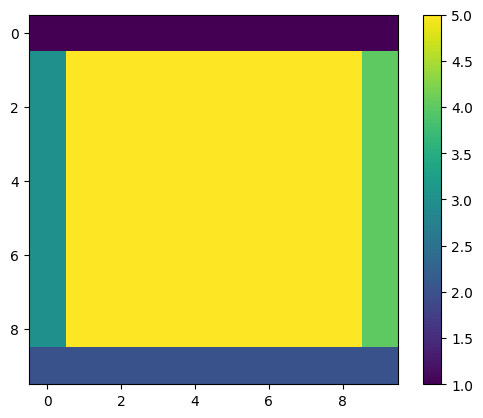

In [5]:
# ===============================
# BOUNDARY CONDITIONS - SIMPLE
# ===============================

import matplotlib.pyplot as plt

nx = 10
ny = 10

f_vals = np.zeros((nx, ny))
points = np.zeros_like(f_vals)
#Iterate through each value
for idx, vals in np.ndenumerate(f_vals):
  x, y = idx

  # top
  if x == 0:
    points[x, y] = 1

  # bottom
  elif x == nx - 1:
    points[x, y] = 2

  # left
  elif y == 0:
    points[x, y] = 3

  # right
  elif y == ny - 1:
    points[x, y] = 4

  else:
    points[x, y] = 5

print(points)
plt.imshow(points)
plt.colorbar()